In [23]:
import pypsa
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.pyplot import cm
import matplotlib.colors as mc
import colorsys

In [24]:
# network = pypsa.Network.add("Line","lines.csv")
network = pypsa.Network()
path = r"C:\Users\pmcw9\Delta-E\PICS\PyPSA_BC\results\pypsa-network"
network.import_from_csv_folder(path)

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 0], imported network file PyPSA version None.

INFO:pypsa.io:Imported network pypsa-network has buses, lines, line_types


In [25]:
# create dictionary for colouring each "node_type"
node_type_2_color = {"DSS":"red",
                     "GSS":"green",
                     "ISS":"black",
                     "TSS":"yellow",
                     "DFS":"cyan",
                     "SWS":"magenta",
                     "JCT":"pink",
                     "INT":"beige",
                     "IPT":"gray"}
bus_2_color = {}
for bus, row in network.buses.iterrows():
    bus_2_color[bus] = node_type_2_color[row["node_type"]]

In [26]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [27]:
# create dictionary for colouring each "line" by the voltage level
color = 'orange'
line_type_2_color = {63:lighten_color(color,amount=0.1),
                     69:lighten_color(color,amount=0.2),
                     138:lighten_color(color,amount=0.3),
                     161:lighten_color(color,amount=0.4),
                     230:lighten_color(color,amount=0.5),
                     287:lighten_color(color,amount=0.6),
                     360:lighten_color(color,amount=0.7),
                     500:lighten_color(color,amount=0.8)
                     }

line_2_color = {}
for line,row in network.lines.iterrows():
    line_2_color[line] = line_type_2_color[row["v_nom"]]

    

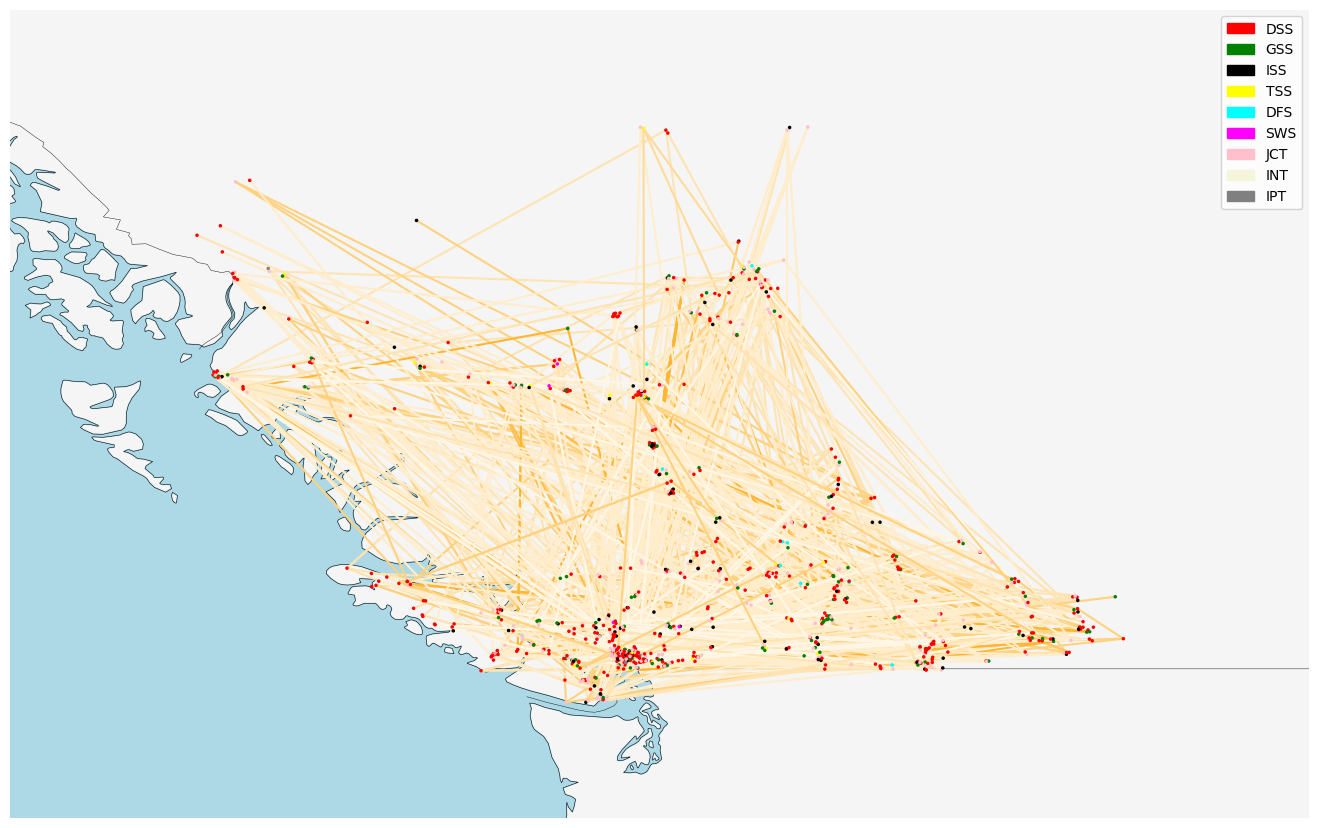

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})

# plt.figure(figsize=(12,12))
network.plot(margin=0.2,
            ax=ax,
            bus_colors=bus_2_color,
            line_colors=line_2_color,
            jitter=0.05,
            bus_sizes=0.001,
            color_geomap = True,
            geomap=True)

legend_items = []
# line_500kV=mlines.Line2D(xdata=[0,1], ydata=[0,0], color='r', label='500kV')
for key,value in node_type_2_color.items():
    legend_items.append(mpatches.Patch(color=value, label=key))

fig.set_size_inches(18.5, 10.5)
ax.legend(handles=legend_items)

# ax.legend(["123"],['123'])

# plt.show()
# plt.legend([12,324,45])
fig.savefig("../results/bc-network.jpg")

# too many connections need to look into long connections to check if they are artificial or not...